<a href="https://colab.research.google.com/github/JEfloyd1567/Calculadora-react/blob/master/tratamientoAlDataSetyRegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1

Conociendo los datos con los que vamos a trabajar.
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.

febrero de 2023


In [1090]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1091]:
!git clone https://github.com/omarcastano/JaverianaML.git

fatal: destination path 'JaverianaML' already exists and is not an empty directory.


In [1092]:
labelencoder= LabelEncoder()
data['C']=labelencoder.fit_transform(data['C'])


In [1093]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [1094]:
#Cual es el tipo de los atributos?
data. dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hpw                int64
Country           object
C                  int64
dtype: object

**Separar en variables categoricas y numericas**



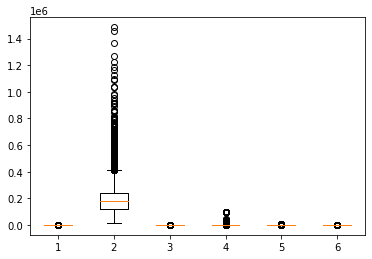

In [1095]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()


In [1096]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,0.0
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1097]:
data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw,C
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
C,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


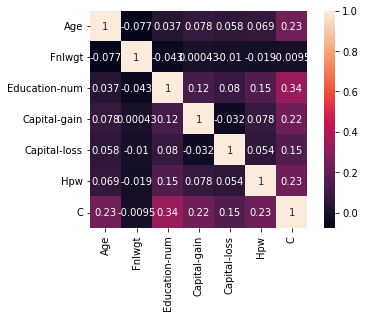

In [1098]:
sns.heatmap(data.corr(), square=True, annot=True)

In [1099]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

3

In [1100]:
print(data.shape)

(32561, 15)


# Datos atipicos eliminados

In [1101]:
"""
list_continua = ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hpw']

for var in list_continua:
  q1 = data[var].quantile(0.25)
  q3 = data[var].quantile(0.75)
  IQR = q3 - q1
  outliers_q1 = data.index[data[var] < q1 - 2*IQR]
  data.drop(labels=outliers_q1, inplace=True)
  outliers_q3 = data.index[data[var] > q3 + 2*IQR]
  data.drop(labels=outliers_q3, inplace=True)
"""

"\nlist_continua = ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hpw']\n\nfor var in list_continua:\n  q1 = data[var].quantile(0.25)\n  q3 = data[var].quantile(0.75)\n  IQR = q3 - q1\n  outliers_q1 = data.index[data[var] < q1 - 2*IQR]\n  data.drop(labels=outliers_q1, inplace=True)\n  outliers_q3 = data.index[data[var] > q3 + 2*IQR]\n  data.drop(labels=outliers_q3, inplace=True)\n"

In [1102]:
#print(data.shape)

# Datos Nulos

In [1103]:
#porcentaje datos nulos en variables
(data.isnull().sum()/data.shape[0])*100

Age               0.000000
Workclass         5.638647
Fnlwgt            0.000000
Education         0.000000
Education-num     0.000000
Marital-status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital-gain      0.000000
Capital-loss      0.000000
Hpw               0.000000
Country           1.790486
C                 0.000000
dtype: float64

In [1104]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            583
C                    0
dtype: int64

# reemplazar datos nulos por la media y moda

In [1105]:
#reemplazar datos nulos en numericos por la media y en categoricos por la moda
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Workclass'].fillna(data['Workclass'].value_counts().index[0], inplace=True)
data['Fnlwgt'].fillna(data['Fnlwgt'].median(), inplace=True)
data['Education'].fillna(data['Education'].value_counts().index[0], inplace=True)
data['Education-num'].fillna(data['Education-num'].median(), inplace=True)
data['Marital-status'].fillna(data['Marital-status'].value_counts().index[0], inplace=True)
data['Occupation'].fillna(data['Occupation'].value_counts().index[0], inplace=True)
data['Relationship'].fillna(data['Relationship'].value_counts().index[0], inplace=True)
data['Race'].fillna(data['Race'].value_counts().index[0], inplace=True)
data['Capital-gain'].fillna(data['Capital-gain'].median(), inplace=True)
data['Capital-loss'].fillna(data['Capital-loss'].median(), inplace=True)
data['Hpw'].fillna(data['Hpw'].median(), inplace=True)
data['Country'].fillna(data['Country'].value_counts().index[0], inplace=True)

In [1106]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
print(data['C'].value_counts()) 

0    24720
1     7841
Name: C, dtype: int64


# Encoder a datos categoricos

In [1107]:
lista_categoricos = [data["Workclass"], data["Education"], data["Marital-status"], data["Occupation"], data["Relationship"], data["Race"], data["Sex"], data["Country"]] #categoricos ya codificados, encoder a los de tipo object
#print(lista_categoricos)
lista_fact = []
for e in lista_categoricos:
  aux, _ = pd.factorize(e)
  lista_fact.append(aux)
print(lista_fact)

[array([0, 1, 2, ..., 2, 2, 5]), array([0, 0, 1, ..., 1, 1, 1]), array([0, 1, 2, ..., 6, 0, 1]), array([0, 1, 2, ..., 0, 0, 1]), array([0, 1, 0, ..., 4, 3, 2]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 0, 0, 0])]


In [1108]:
data["Workclass"] = lista_fact[0]
data["Education"] = lista_fact[1]
data["Marital-status"] = lista_fact[2]
data["Occupation"] = lista_fact[3]
data["Relationship"] = lista_fact[4]
data["Race"] = lista_fact[5]
data["Sex"] = lista_fact[6]
data["Country"] = lista_fact[7]

In [1109]:
print(data)

       Age  Workclass  Fnlwgt  Education  Education-num  Marital-status  \
0       39          0   77516          0             13               0   
1       50          1   83311          0             13               1   
2       38          2  215646          1              9               2   
3       53          2  234721          2              7               1   
4       28          2  338409          0             13               1   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          6             12               1   
32557   40          2  154374          1              9               1   
32558   58          2  151910          1              9               6   
32559   22          2  201490          1              9               0   
32560   52          5  287927          1              9               1   

       Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  \
0               0   

# Normalizar Datos

In [1110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
#transformer = RobustScaler().fit(data.drop(['C'], 1))
#transformer = MaxAbsScaler().fit(data.drop(['C'], 1))
newData = scaler.fit_transform(data.drop(['C'], 1))
#newData = transformer.transform(data.drop(['C'], 1))
print(newData)

[[0.30136986 0.         0.0443019  ... 0.         0.39795918 0.        ]
 [0.45205479 0.14285714 0.0482376  ... 0.         0.12244898 0.        ]
 [0.28767123 0.28571429 0.13811345 ... 0.         0.39795918 0.        ]
 ...
 [0.56164384 0.28571429 0.09482688 ... 0.         0.39795918 0.        ]
 [0.06849315 0.28571429 0.12849934 ... 0.         0.19387755 0.        ]
 [0.47945205 0.71428571 0.18720338 ... 0.         0.39795918 0.        ]]


<ipython-input-1110-ba1068ad2026>:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



# F1 con parametros por default

In [1111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = np.array(newData)
y = np.array(data['C'])



In [1112]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [1113]:
model.score(X,y)

0.8222413316544332

In [1114]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [1115]:
print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(22792, 14) (22792,)
(9769, 14) (9769,)


In [1116]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.535304 (0.014323)


In [1117]:
predictions = model.predict(X_validation)
print(f1_score(Y_validation, predictions))

0.532695374800638


In [1118]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7413
           1       0.71      0.43      0.53      2356

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.80      9769



# F1 con balanceo y K-folds

**balanceo por parametros de la regresion logistica**

In [1119]:
print(data['C'].value_counts()) 

0    24720
1     7841
Name: C, dtype: int64


In [1120]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [1121]:
"weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento."

def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_validation, Y_train, Y_validation)


kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

predictions = model.predict(X_validation)
print(f1_score(Y_validation, predictions))

print(classification_report(Y_validation, predictions))


Logistic Regression: 0.611098 (0.012995)
0.6076896903708745
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      7413
           1       0.51      0.76      0.61      2356

    accuracy                           0.76      9769
   macro avg       0.71      0.76      0.72      9769
weighted avg       0.81      0.76      0.78      9769



**Eliminacion de los datos**

In [1122]:
rus = RandomUnderSampler()
nm = NearMiss()
dataRus, targetRus = rus.fit_resample(data, data['C'])
validation_size = 0.30
seed = 7
X_train2, X_validation2, Y_train2, Y_validation2 = train_test_split(dataRus, targetRus, test_size=validation_size, random_state=seed)

model = run_model_balanced(X_train2, X_validation2, Y_train2, Y_validation2)

kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train2, Y_train2, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

predictions = model.predict(X_validation2)
print(f1_score(Y_validation2, predictions))

print(classification_report(Y_validation2, predictions))

Logistic Regression: 0.594799 (0.024028)
0.6120071684587813
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2324
           1       0.66      0.57      0.61      2381

    accuracy                           0.63      4705
   macro avg       0.63      0.63      0.63      4705
weighted avg       0.63      0.63      0.63      4705



In [1123]:
dataNm, targetNm = nm.fit_resample(data, data['C'])
validation_size = 0.30
seed = 7
X_train2, X_validation2, Y_train2, Y_validation2 = train_test_split(dataRus, targetRus, test_size=validation_size, random_state=seed)

model = run_model_balanced(X_train2, X_validation2, Y_train2, Y_validation2)

kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train2, Y_train2, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

predictions = model.predict(X_validation2)
print(f1_score(Y_validation2, predictions))

print(classification_report(Y_validation2, predictions))

Logistic Regression: 0.594799 (0.024028)
0.6120071684587813
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2324
           1       0.66      0.57      0.61      2381

    accuracy                           0.63      4705
   macro avg       0.63      0.63      0.63      4705
weighted avg       0.63      0.63      0.63      4705



**aumento de muestras**